This notebook shows the spectrum result in Section 2.3.1 (Fig S3) in

    <Deriving information from missing data: implications for mood prediction>

In [1]:
import os
import random
import numpy as np
import datetime
import time
import csv
import math
import scipy
import seaborn as sns
import h5py
import pickle
from tqdm import tqdm
import copy

import iisignature

from datetime import date

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from data_cleaning import *
from classifiers import *
from data_transforms import *
from spectrum_functions import *

Load ALTAN/QIDS data in AMoSS dataset

In [2]:
test_path='./all-true-colours-matlab-2017-02-27-18-38-12-nick/'
participants_list, participants_data_list,\
                     participants_time_list=loadParticipants(test_path)

Participants=make_classes(participants_data_list,\
                          participants_time_list,\
                          participants_list)

cohort=cleaning_sameweek_data(cleaning_same_data(Participants))

14050


In [117]:
if __name__ == "__main__":
    """Plots a triangle and the density map of the proportion
    of periods of time participants with a specific diagnosis
    spend in each clinical category.
    """

    random.seed(42)
    np.random.seed(42)

    path_save='./dataset_spectrum/'
    
    """
    Step 1

    Load the cohort. Then, take each participant
    and create a testing set (using the participant)
    and a training set (using the rest of the
    cohort) and save it as a file.
    """
    size = 20

    

    print("number of participants in the cohort:", len(cohort))
    
    # Only consider participants that provided at least 5 buckets of data
    
    valid_participants = [participant for participant in cohort if\
                          np.minimum(len(participant.data[0]), len(participant.data[1]))>int(size+5)]
  
    print("number of vaid participants:", len(valid_participants))
    print("Exporting participants...")
    
    for ref_participant in tqdm(valid_participants):
        # Use participant for testing
        test_participant=[ref_participant]

        # Use the remaining participants for training.
        train_participants=[participant for participant in valid_participants if participant!=ref_participant]

        # Check that ref_participant is not in train_participants
        assert ref_participant not in train_participants
        
        # Save the testing and training sets as a file
        random_id = random.randint(0, 1e8)
        export(test_participant, random_id)
        export(train_participants, random_id)
        



    """
    Step 2

    For each participant in the clinical group we are interested in,
    test the model with data from this participant. The model is
    trained using the remaining participants in the cohort.

    """




    folders = get_folders(path_save)
    scores = []
    print("Calculating points...")
    for folder in tqdm(folders):
        # Train the model
        model=train(path_save+folder+"/train_set.obj")

        # Test the model
        score=model.test(path_save+folder+"/test_set.obj")

        # Save the score
        scores.append((folder, score))



    """
    Step 3

    Asign each score to the corresponding clinical group

    """

    trianglePoints={
                        "bipolar":     [],
                        "healthy":     [],
                        "borderline":  []
                    }

    for id, score in scores:
        
        category = getCategory(id,path_save=path_save)
        
        trianglePoints[category].append(score)
    
 

  0%|          | 0/119 [00:00<?, ?it/s]

Calculating points...


100%|██████████| 119/119 [02:35<00:00,  1.26s/it]


The spectrum plots for BD and BPD

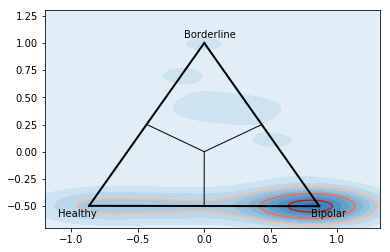

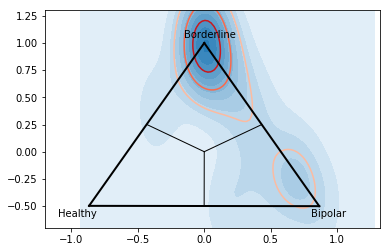

In [106]:
plotDensityMap(trianglePoints["bipolar"])
plotDensityMap(trianglePoints["borderline"])

The spectrum plot for HC (All the data compacts at Healthy corner, which is a sign of good prediction, but requires trim_triangle to make the blue region "larger" enough to cover the triangle)

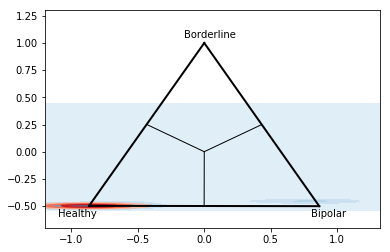

In [97]:
plotDensityMap(trianglePoints["healthy"])